In [0]:
# !pip install matplotlib==3 
# !pip install --upgrade geopandas
# !pip install --upgrade pyshp
# !pip install --upgrade shapely
# !pip install --upgrade descartes

In [0]:
### Import the needed libraries.

import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas 
import matplotlib.style as style
# from OpticalRS import *

In [0]:
pd.set_option('display.max_rows', 100)

In [79]:
### Import the file

!wget 'https://www.dropbox.com/s/7lxuitoyblqz4a1/Relationship_between_LGB_inclusion_and_economic_development_in_2017.csv'

--2020-02-07 05:10:59--  https://www.dropbox.com/s/7lxuitoyblqz4a1/Relationship_between_LGB_inclusion_and_economic_development_in_2017.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7lxuitoyblqz4a1/Relationship_between_LGB_inclusion_and_economic_development_in_2017.csv [following]
--2020-02-07 05:11:00--  https://www.dropbox.com/s/raw/7lxuitoyblqz4a1/Relationship_between_LGB_inclusion_and_economic_development_in_2017.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2ee5a7c41cbf2f69c5a717256f.dl.dropboxusercontent.com/cd/0/inline/AxrdBJbTPFeTlvRPchMfOXisNh-g88Rn5aWkWd7VZ0Y-Fou5H7H-EgSQkZMy9GslpTHCI-ytVo-FjQ1pV7H9xIGPf7tAsRXOnbiE1KVmwGnZqel0OjkVJtFRTGX8rHLAHrE/file# [following]
--2020-02-07 05:11:00--  https://u

In [80]:
df = pd.read_csv('Relationship_between_LGB_inclusion_and_economic_development_in_2017.csv')

df.head()

,Continent,Non-State,Country,Country Code,Legal (all genders),Age Of consent,Gender,Penalising text,Promotion/Morality,Ma.x Sentences (M)onths and (Y)ears,Death Sentence,Arrests in past 3 years?,Ban on NGOs,NRHI - SO-inclusive?,Constitution Protection,Employment Protection,Other Protection,Hate Crime Protection,Incitemenrt Protection,CT Ban Protection,Marriage Recognition,Civil recognition,Joint adoption,2nd parent adoption,GDP (current US$) - 2007,GDP (current US$) - 2008,GDP (current US$) - 2009,GDP (current US$) - 2010,GDP (current US$) - 2011,GDP (current US$) - 2012,GDP (current US$) - 2013,GDP (current US$) - 2014,GDP (current US$) - 2015,GDP (current US$) - 2016,GDP (current US$) - 2017,Research and development expenditure (% of GDP) - 2007,Research and development expenditure (% of GDP) - 2008,Research and development expenditure (% of GDP) - 2009,Research and development expenditure (% of GDP) - 2010,Research and development expenditure (% of GDP) - 2011,Research and development expenditure (% of GDP) - 2012,Research and development expenditure (% of GDP) - 2013,Research and development expenditure (% of GDP) - 2014,Research and development expenditure (% of GDP) - 2015,Research and development expenditure (% of GDP) - 2016,Research and development expenditure (% of GDP) - 2017,GDP per capita (current US$) - 2007,GDP per capita (current US$) - 2008,GDP per capita (current US$) - 2009,GDP per capita (current US$) - 2010,GDP per capita (current US$) - 2011,GDP per capita (current US$) - 2012,GDP per capita (current US$) - 2013,GDP per capita (current US$) - 2014,GDP per capita (current US$) - 2015,GDP per capita (current US$) - 2016,GDP per capita (current US$) - 2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AF,NaN,Algeria,DZA,Ilegal,Unknown,Both,Sexual Act,Morality Code,3 - 7 yrs,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1.350000e+11,1.710000e+11,1.370000e+11,1.610000e+11,2.000000e+11,2.090000e+11,2.100000e+11,2.140000e+11,1.660000e+11,1.600000e+11,1.670000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.53347,NaN,3950.561607,4923.540099,3883.378143,4480.724539,5455.741338,5592.326098,5499.581487,5493.025590,4177.867517,3946.421445,4044.298372
2,AF,NaN,Angola,AGO,Ilegal,Unknown,Both,Against nature,Unknown,3 - 7 yrs,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.120000e+11,1.280000e+11,1.370000e+11,1.460000e+11,1.160000e+11,1.010000e+11,1.220000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3121.995637,4080.941410,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942
3,AF,NaN,Benin,BEN,Legal,Unequal,NaN,NaN,NaN,NaN,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,5.969535e+09,7.132787e+09,7.097199e+09,6.977041e+09,7.824320e+09,8.152088e+09,9.159959e+09,9.720363e+09,8.294491e+09,8.578984e+09,9.269595e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,706.053375,820.150878,793.452253,758.435083,827.022611,837.894997,915.575816,944.931653,784.278407,789.084915,829.478803
4,AF,NaN,Botswana,BWA,Ilegal,Unknown,Both,Against nature,Unknown,3 - 7 yrs,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,1.093905e+10,1.094507e+10,1.026713e+10,1.278665e+10,1.535197e+10,1.606716e+10,1.490175e+10,1.625075e+10,1.442060e+10,1.564632e+10,1.740554e+10,NaN,NaN,NaN,NaN,0.25411,0.53728,NaN,NaN,NaN,NaN,NaN,5832.733942,5713.534983,5255.768461,6434.815657,7617.325094,7877.790350,7224.965172,7780.638385,6799.875234,7243.852997,7893.210108


In [81]:
### First we have a df with a null row, so we are getting rid og it.

df = df.drop(axis= 0, index= 0)

print('The shape of the dataset is', df.shape)

df.head()




The shape of the dataset is (199, 57)


,Continent,Non-State,Country,Country Code,Legal (all genders),Age Of consent,Gender,Penalising text,Promotion/Morality,Ma.x Sentences (M)onths and (Y)ears,Death Sentence,Arrests in past 3 years?,Ban on NGOs,NRHI - SO-inclusive?,Constitution Protection,Employment Protection,Other Protection,Hate Crime Protection,Incitemenrt Protection,CT Ban Protection,Marriage Recognition,Civil recognition,Joint adoption,2nd parent adoption,GDP (current US$) - 2007,GDP (current US$) - 2008,GDP (current US$) - 2009,GDP (current US$) - 2010,GDP (current US$) - 2011,GDP (current US$) - 2012,GDP (current US$) - 2013,GDP (current US$) - 2014,GDP (current US$) - 2015,GDP (current US$) - 2016,GDP (current US$) - 2017,Research and development expenditure (% of GDP) - 2007,Research and development expenditure (% of GDP) - 2008,Research and development expenditure (% of GDP) - 2009,Research and development expenditure (% of GDP) - 2010,Research and development expenditure (% of GDP) - 2011,Research and development expenditure (% of GDP) - 2012,Research and development expenditure (% of GDP) - 2013,Research and development expenditure (% of GDP) - 2014,Research and development expenditure (% of GDP) - 2015,Research and development expenditure (% of GDP) - 2016,Research and development expenditure (% of GDP) - 2017,GDP per capita (current US$) - 2007,GDP per capita (current US$) - 2008,GDP per capita (current US$) - 2009,GDP per capita (current US$) - 2010,GDP per capita (current US$) - 2011,GDP per capita (current US$) - 2012,GDP per capita (current US$) - 2013,GDP per capita (current US$) - 2014,GDP per capita (current US$) - 2015,GDP per capita (current US$) - 2016,GDP per capita (current US$) - 2017
1,AF,NaN,Algeria,DZA,Ilegal,Unknown,Both,Sexual Act,Morality Code,3 - 7 yrs,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1.350000e+11,1.710000e+11,1.370000e+11,1.610000e+11,2.000000e+11,2.090000e+11,2.100000e+11,2.140000e+11,1.660000e+11,1.600000e+11,1.670000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.53347,NaN,3950.561607,4923.540099,3883.378143,4480.724539,5455.741338,5592.326098,5499.581487,5493.025590,4177.867517,3946.421445,4044.298372
2,AF,NaN,Angola,AGO,Ilegal,Unknown,Both,Against nature,Unknown,3 - 7 yrs,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.120000e+11,1.280000e+11,1.370000e+11,1.460000e+11,1.160000e+11,1.010000e+11,1.220000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3121.995637,4080.941410,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942
3,AF,NaN,Benin,BEN,Legal,Unequal,NaN,NaN,NaN,NaN,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,5.969535e+09,7.132787e+09,7.097199e+09,6.977041e+09,7.824320e+09,8.152088e+09,9.159959e+09,9.720363e+09,8.294491e+09,8.578984e+09,9.269595e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,706.053375,820.150878,793.452253,758.435083,827.022611,837.894997,915.575816,944.931653,784.278407,789.084915,829.478803
4,AF,NaN,Botswana,BWA,Ilegal,Unknown,Both,Against nature,Unknown,3 - 7 yrs,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,1.093905e+10,1.094507e+10,1.026713e+10,1.278665e+10,1.535197e+10,1.606716e+10,1.490175e+10,1.625075e+10,1.442060e+10,1.564632e+10,1.740554e+10,NaN,NaN,NaN,NaN,0.25411,0.53728,NaN,NaN,NaN,NaN,NaN,5832.733942,5713.534983,5255.768461,6434.815657,7617.325094,7877.790350,7224.965172,7780.638385,6799.875234,7243.852997,7893.210108
5,AF,NaN,Burkina Faso,BFA,Legal,Equal,NaN,NaN,NaN,NaN,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,6.771278e+09,8.369637e+09,8.369175e+09,8.979967e+09,1.072406e+10,1.116606e+10,1.194718e+10,1.237739e+10,1.041930e+10,1.086702e+10,1.233034e+10,0.18634,0.25,NaN,NaN,NaN,NaN,0.22183,0.22183,NaN,0.67380,NaN,475.110012,569.761317,552.745589,575.446453,666.840120,673.821598,699.779406,703.820056,575.314454,582.795444,642.429839


In [82]:
### As our most important index is the country, we first check if theres a null value missing in the Country Column.

df['Country'].isnull().any()

False

In [0]:

## We can continue.
##We do not have the desire relation between rows and columns. But we are not using all the columns at once. Maybe we are kicking out some



In [83]:
##As I said before, our real index is the Country, so I'm setting Country as our index.

df = df.set_index('Country')


print('The new shape of the dataset is', df.shape)
df.head()

The new shape of the dataset is (199, 56)


,Continent,Non-State,Country Code,Legal (all genders),Age Of consent,Gender,Penalising text,Promotion/Morality,Ma.x Sentences (M)onths and (Y)ears,Death Sentence,Arrests in past 3 years?,Ban on NGOs,NRHI - SO-inclusive?,Constitution Protection,Employment Protection,Other Protection,Hate Crime Protection,Incitemenrt Protection,CT Ban Protection,Marriage Recognition,Civil recognition,Joint adoption,2nd parent adoption,GDP (current US$) - 2007,GDP (current US$) - 2008,GDP (current US$) - 2009,GDP (current US$) - 2010,GDP (current US$) - 2011,GDP (current US$) - 2012,GDP (current US$) - 2013,GDP (current US$) - 2014,GDP (current US$) - 2015,GDP (current US$) - 2016,GDP (current US$) - 2017,Research and development expenditure (% of GDP) - 2007,Research and development expenditure (% of GDP) - 2008,Research and development expenditure (% of GDP) - 2009,Research and development expenditure (% of GDP) - 2010,Research and development expenditure (% of GDP) - 2011,Research and development expenditure (% of GDP) - 2012,Research and development expenditure (% of GDP) - 2013,Research and development expenditure (% of GDP) - 2014,Research and development expenditure (% of GDP) - 2015,Research and development expenditure (% of GDP) - 2016,Research and development expenditure (% of GDP) - 2017,GDP per capita (current US$) - 2007,GDP per capita (current US$) - 2008,GDP per capita (current US$) - 2009,GDP per capita (current US$) - 2010,GDP per capita (current US$) - 2011,GDP per capita (current US$) - 2012,GDP per capita (current US$) - 2013,GDP per capita (current US$) - 2014,GDP per capita (current US$) - 2015,GDP per capita (current US$) - 2016,GDP per capita (current US$) - 2017
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Algeria,AF,NaN,DZA,Ilegal,Unknown,Both,Sexual Act,Morality Code,3 - 7 yrs,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1.350000e+11,1.710000e+11,1.370000e+11,1.610000e+11,2.000000e+11,2.090000e+11,2.100000e+11,2.140000e+11,1.660000e+11,1.600000e+11,1.670000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.53347,NaN,3950.561607,4923.540099,3883.378143,4480.724539,5455.741338,5592.326098,5499.581487,5493.025590,4177.867517,3946.421445,4044.298372
Angola,AF,NaN,AGO,Ilegal,Unknown,Both,Against nature,Unknown,3 - 7 yrs,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.120000e+11,1.280000e+11,1.370000e+11,1.460000e+11,1.160000e+11,1.010000e+11,1.220000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3121.995637,4080.941410,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942
Benin,AF,NaN,BEN,Legal,Unequal,NaN,NaN,NaN,NaN,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,5.969535e+09,7.132787e+09,7.097199e+09,6.977041e+09,7.824320e+09,8.152088e+09,9.159959e+09,9.720363e+09,8.294491e+09,8.578984e+09,9.269595e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,706.053375,820.150878,793.452253,758.435083,827.022611,837.894997,915.575816,944.931653,784.278407,789.084915,829.478803
Botswana,AF,NaN,BWA,Ilegal,Unknown,Both,Against nature,Unknown,3 - 7 yrs,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,1.093905e+10,1.094507e+10,1.026713e+10,1.278665e+10,1.535197e+10,1.606716e+10,1.490175e+10,1.625075e+10,1.442060e+10,1.564632e+10,1.740554e+10,NaN,NaN,NaN,NaN,0.25411,0.53728,NaN,NaN,NaN,NaN,NaN,5832.733942,5713.534983,5255.768461,6434.815657,7617.325094,7877.790350,7224.965172,7780.638385,6799.875234,7243.852997,7893.210108
Burkina Faso,AF,NaN,BFA,Legal,Equal,NaN,NaN,NaN,NaN,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,6.771278e+09,8.369637e+09,8.369175e+09,8.979967e+09,1.072406e+10,1.116606e+10,1.194718e+10,1.237739e+10,1.041930e+10,1.086702e+10,1.233034e+10,0.18634,0.25,NaN,NaN,NaN,NaN,0.22183,0.22183,NaN,0.67380,NaN,475.110012,569.761317,552.745589,575.446453,666.840120,673.821598,699.779406,703.820056,575.314454,582.795444,642.429839


In [84]:
### Look how many info we have of the non-State entries.


#The following is the percent of null values of the non-State Rows, so we are cutting them out.
df[df['Non-State'].isnull()==False].isnull().sum() / 4 * 100

# df[df['Non-State'].isnull()==False].isnull().index.tolist()

Continent                                                 100.0
Non-State                                                   0.0
Country Code                                               75.0
Legal (all genders)                                         0.0
Age Of consent                                              0.0
Gender                                                     25.0
Penalising text                                            25.0
Promotion/Morality                                         25.0
Ma.x Sentences (M)onths and (Y)ears                        25.0
Death Sentence                                              0.0
Arrests in past 3 years?                                    0.0
Ban on NGOs                                                 0.0
NRHI - SO-inclusive?                                        0.0
Constitution Protection                                     0.0
Employment Protection                                       0.0
Other Protection                        

In [85]:
df = df.drop(labels=df[df['Non-State'].isnull()==False].isnull().index.tolist(),axis=0)

df = df.drop(columns='Non-State')

print('The new shape of the dataset is', df.shape)

df.head()

The new shape of the dataset is (195, 55)


,Continent,Country Code,Legal (all genders),Age Of consent,Gender,Penalising text,Promotion/Morality,Ma.x Sentences (M)onths and (Y)ears,Death Sentence,Arrests in past 3 years?,Ban on NGOs,NRHI - SO-inclusive?,Constitution Protection,Employment Protection,Other Protection,Hate Crime Protection,Incitemenrt Protection,CT Ban Protection,Marriage Recognition,Civil recognition,Joint adoption,2nd parent adoption,GDP (current US$) - 2007,GDP (current US$) - 2008,GDP (current US$) - 2009,GDP (current US$) - 2010,GDP (current US$) - 2011,GDP (current US$) - 2012,GDP (current US$) - 2013,GDP (current US$) - 2014,GDP (current US$) - 2015,GDP (current US$) - 2016,GDP (current US$) - 2017,Research and development expenditure (% of GDP) - 2007,Research and development expenditure (% of GDP) - 2008,Research and development expenditure (% of GDP) - 2009,Research and development expenditure (% of GDP) - 2010,Research and development expenditure (% of GDP) - 2011,Research and development expenditure (% of GDP) - 2012,Research and development expenditure (% of GDP) - 2013,Research and development expenditure (% of GDP) - 2014,Research and development expenditure (% of GDP) - 2015,Research and development expenditure (% of GDP) - 2016,Research and development expenditure (% of GDP) - 2017,GDP per capita (current US$) - 2007,GDP per capita (current US$) - 2008,GDP per capita (current US$) - 2009,GDP per capita (current US$) - 2010,GDP per capita (current US$) - 2011,GDP per capita (current US$) - 2012,GDP per capita (current US$) - 2013,GDP per capita (current US$) - 2014,GDP per capita (current US$) - 2015,GDP per capita (current US$) - 2016,GDP per capita (current US$) - 2017
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Algeria,AF,DZA,Ilegal,Unknown,Both,Sexual Act,Morality Code,3 - 7 yrs,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1.350000e+11,1.710000e+11,1.370000e+11,1.610000e+11,2.000000e+11,2.090000e+11,2.100000e+11,2.140000e+11,1.660000e+11,1.600000e+11,1.670000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.53347,NaN,3950.561607,4923.540099,3883.378143,4480.724539,5455.741338,5592.326098,5499.581487,5493.025590,4177.867517,3946.421445,4044.298372
Angola,AF,AGO,Ilegal,Unknown,Both,Against nature,Unknown,3 - 7 yrs,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.120000e+11,1.280000e+11,1.370000e+11,1.460000e+11,1.160000e+11,1.010000e+11,1.220000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3121.995637,4080.941410,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942
Benin,AF,BEN,Legal,Unequal,NaN,NaN,NaN,NaN,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,5.969535e+09,7.132787e+09,7.097199e+09,6.977041e+09,7.824320e+09,8.152088e+09,9.159959e+09,9.720363e+09,8.294491e+09,8.578984e+09,9.269595e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,706.053375,820.150878,793.452253,758.435083,827.022611,837.894997,915.575816,944.931653,784.278407,789.084915,829.478803
Botswana,AF,BWA,Ilegal,Unknown,Both,Against nature,Unknown,3 - 7 yrs,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,1.093905e+10,1.094507e+10,1.026713e+10,1.278665e+10,1.535197e+10,1.606716e+10,1.490175e+10,1.625075e+10,1.442060e+10,1.564632e+10,1.740554e+10,NaN,NaN,NaN,NaN,0.25411,0.53728,NaN,NaN,NaN,NaN,NaN,5832.733942,5713.534983,5255.768461,6434.815657,7617.325094,7877.790350,7224.965172,7780.638385,6799.875234,7243.852997,7893.210108
Burkina Faso,AF,BFA,Legal,Equal,NaN,NaN,NaN,NaN,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,6.771278e+09,8.369637e+09,8.369175e+09,8.979967e+09,1.072406e+10,1.116606e+10,1.194718e+10,1.237739e+10,1.041930e+10,1.086702e+10,1.233034e+10,0.18634,0.25,NaN,NaN,NaN,NaN,0.22183,0.22183,NaN,0.67380,NaN,475.110012,569.761317,552.745589,575.446453,666.840120,673.821598,699.779406,703.820056,575.314454,582.795444,642.429839


In [86]:
df.dtypes

Continent                                                  object
Country Code                                               object
Legal (all genders)                                        object
Age Of consent                                             object
Gender                                                     object
Penalising text                                            object
Promotion/Morality                                         object
Ma.x Sentences (M)onths and (Y)ears                        object
Death Sentence                                             object
Arrests in past 3 years?                                   object
Ban on NGOs                                                object
NRHI - SO-inclusive?                                       object
Constitution Protection                                    object
Employment Protection                                      object
Other Protection                                           object
Hate Crime

#What about the countries we are studing?

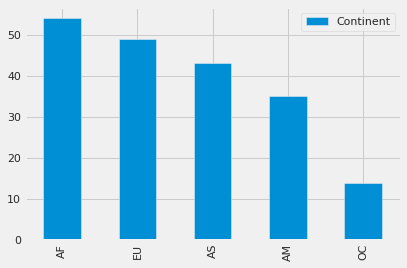

In [87]:
#There are five continents as expected, and their percentages are shown below:

Continents = pd.DataFrame(df['Continent'].value_counts())
Continents.plot.bar(y='Continent')

plt.show()


In [88]:
##

print('The  prevalence (in %) by Continent is:')

pd.DataFrame(df['Continent'].value_counts()) / len(df['Continent']) * 100

The  prevalence (in %) by Continent is:


,Continent
AF,27.692308
EU,25.128205
AS,22.051282
AM,17.948718
OC,7.179487


#Splitting the data to get more info.

In [89]:
### Now I'm splitting the df into three sub dataframes according to the data.


##Enumarate the columns.
pd.DataFrame([df.columns.tolist()])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,Continent,Country Code,Legal (all genders),Age Of consent,Gender,Penalising text,Promotion/Morality,Ma.x Sentences (M)onths and (Y)ears,Death Sentence,Arrests in past 3 years?,Ban on NGOs,NRHI - SO-inclusive?,Constitution Protection,Employment Protection,Other Protection,Hate Crime Protection,Incitemenrt Protection,CT Ban Protection,Marriage Recognition,Civil recognition,Joint adoption,2nd parent adoption,GDP (current US$) - 2007,GDP (current US$) - 2008,GDP (current US$) - 2009,GDP (current US$) - 2010,GDP (current US$) - 2011,GDP (current US$) - 2012,GDP (current US$) - 2013,GDP (current US$) - 2014,GDP (current US$) - 2015,GDP (current US$) - 2016,GDP (current US$) - 2017,Research and development expenditure (% of GDP...,Research and development expenditure (% of GDP...,Research and development expenditure (% of GDP...,Research and development expenditure (% of GDP...,Research and development expenditure (% of GDP...,Research and development expenditure (% of GDP...,Research and development expenditure (% of GDP...,Research and development expenditure (% of GDP...,Research and development expenditure (% of GDP...,Research and development expenditure (% of GDP...,Research and development expenditure (% of GDP...,GDP per capita (current US$) - 2007,GDP per capita (current US$) - 2008,GDP per capita (current US$) - 2009,GDP per capita (current US$) - 2010,GDP per capita (current US$) - 2011,GDP per capita (current US$) - 2012,GDP per capita (current US$) - 2013,GDP per capita (current US$) - 2014,GDP per capita (current US$) - 2015,GDP per capita (current US$) - 2016,GDP per capita (current US$) - 2017


In [90]:
### First we got the Rights data frame: rdf.

rdf = df.iloc[:,0:22]

print('The shape of this new dataframe is:', rdf.shape)

rdf.head()

The shape of this new dataframe is: (195, 22)


,Continent,Country Code,Legal (all genders),Age Of consent,Gender,Penalising text,Promotion/Morality,Ma.x Sentences (M)onths and (Y)ears,Death Sentence,Arrests in past 3 years?,Ban on NGOs,NRHI - SO-inclusive?,Constitution Protection,Employment Protection,Other Protection,Hate Crime Protection,Incitemenrt Protection,CT Ban Protection,Marriage Recognition,Civil recognition,Joint adoption,2nd parent adoption
Country,,,,,,,,,,,,,,,,,,,,,,
Algeria,AF,DZA,Ilegal,Unknown,Both,Sexual Act,Morality Code,3 - 7 yrs,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No
Angola,AF,AGO,Ilegal,Unknown,Both,Against nature,Unknown,3 - 7 yrs,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No
Benin,AF,BEN,Legal,Unequal,NaN,NaN,NaN,NaN,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No
Botswana,AF,BWA,Ilegal,Unknown,Both,Against nature,Unknown,3 - 7 yrs,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No
Burkina Faso,AF,BFA,Legal,Equal,NaN,NaN,NaN,NaN,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No


In [91]:
### Second, we got the GDP by country.

gdp = pd.concat([df.iloc[:,0:2], df.iloc[:,22:33]], axis=1, join='inner')

# df.iloc[:,0:2] & df.iloc[:,22:33]

gdp.head()

,Continent,Country Code,GDP (current US$) - 2007,GDP (current US$) - 2008,GDP (current US$) - 2009,GDP (current US$) - 2010,GDP (current US$) - 2011,GDP (current US$) - 2012,GDP (current US$) - 2013,GDP (current US$) - 2014,GDP (current US$) - 2015,GDP (current US$) - 2016,GDP (current US$) - 2017
Country,,,,,,,,,,,,,
Algeria,AF,DZA,1.350000e+11,1.710000e+11,1.370000e+11,1.610000e+11,2.000000e+11,2.090000e+11,2.100000e+11,2.140000e+11,1.660000e+11,1.600000e+11,1.670000e+11
Angola,AF,AGO,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.120000e+11,1.280000e+11,1.370000e+11,1.460000e+11,1.160000e+11,1.010000e+11,1.220000e+11
Benin,AF,BEN,5.969535e+09,7.132787e+09,7.097199e+09,6.977041e+09,7.824320e+09,8.152088e+09,9.159959e+09,9.720363e+09,8.294491e+09,8.578984e+09,9.269595e+09
Botswana,AF,BWA,1.093905e+10,1.094507e+10,1.026713e+10,1.278665e+10,1.535197e+10,1.606716e+10,1.490175e+10,1.625075e+10,1.442060e+10,1.564632e+10,1.740554e+10
Burkina Faso,AF,BFA,6.771278e+09,8.369637e+09,8.369175e+09,8.979967e+09,1.072406e+10,1.116606e+10,1.194718e+10,1.237739e+10,1.041930e+10,1.086702e+10,1.233034e+10


In [92]:
invpcount= pd.concat([df.iloc[:,0:2], df.iloc[:,33:44]], axis=1, join='inner')



invpcount.head()

,Continent,Country Code,Research and development expenditure (% of GDP) - 2007,Research and development expenditure (% of GDP) - 2008,Research and development expenditure (% of GDP) - 2009,Research and development expenditure (% of GDP) - 2010,Research and development expenditure (% of GDP) - 2011,Research and development expenditure (% of GDP) - 2012,Research and development expenditure (% of GDP) - 2013,Research and development expenditure (% of GDP) - 2014,Research and development expenditure (% of GDP) - 2015,Research and development expenditure (% of GDP) - 2016,Research and development expenditure (% of GDP) - 2017
Country,,,,,,,,,,,,,
Algeria,AF,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.53347,NaN
Angola,AF,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Benin,AF,BEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Botswana,AF,BWA,NaN,NaN,NaN,NaN,0.25411,0.53728,NaN,NaN,NaN,NaN,NaN
Burkina Faso,AF,BFA,0.18634,0.25,NaN,NaN,NaN,NaN,0.22183,0.22183,NaN,0.67380,NaN


In [93]:
gdppc= pd.concat([df.iloc[:,0:2], df.iloc[:,44:55]], axis=1, join='inner')

# df.iloc[:,0:2] & df.iloc[:,44:55]

gdppc.head()

,Continent,Country Code,GDP per capita (current US$) - 2007,GDP per capita (current US$) - 2008,GDP per capita (current US$) - 2009,GDP per capita (current US$) - 2010,GDP per capita (current US$) - 2011,GDP per capita (current US$) - 2012,GDP per capita (current US$) - 2013,GDP per capita (current US$) - 2014,GDP per capita (current US$) - 2015,GDP per capita (current US$) - 2016,GDP per capita (current US$) - 2017
Country,,,,,,,,,,,,,
Algeria,AF,DZA,3950.561607,4923.540099,3883.378143,4480.724539,5455.741338,5592.326098,5499.581487,5493.025590,4177.867517,3946.421445,4044.298372
Angola,AF,AGO,3121.995637,4080.941410,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942
Benin,AF,BEN,706.053375,820.150878,793.452253,758.435083,827.022611,837.894997,915.575816,944.931653,784.278407,789.084915,829.478803
Botswana,AF,BWA,5832.733942,5713.534983,5255.768461,6434.815657,7617.325094,7877.790350,7224.965172,7780.638385,6799.875234,7243.852997,7893.210108
Burkina Faso,AF,BFA,475.110012,569.761317,552.745589,575.446453,666.840120,673.821598,699.779406,703.820056,575.314454,582.795444,642.429839


#Describing the new dataframes

###First the Rights Data Frame


In [94]:
rdf.describe()

,Continent,Country Code,Legal (all genders),Age Of consent,Gender,Penalising text,Promotion/Morality,Ma.x Sentences (M)onths and (Y)ears,Death Sentence,Arrests in past 3 years?,Ban on NGOs,NRHI - SO-inclusive?,Constitution Protection,Employment Protection,Other Protection,Hate Crime Protection,Incitemenrt Protection,CT Ban Protection,Marriage Recognition,Civil recognition,Joint adoption,2nd parent adoption
count,195,194,195,195,72,72,76,74,195,195,195,195,195,195,195,195,195,195,195,195,195,195
unique,5,194,2,3,2,7,4,5,5,2,1,5,2,2,2,2,2,2,2,2,2,2
top,AF,KEN,Legal,Equal,Both,Against nature,Unknown,8 - 13 yrs,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No
freq,54,1,124,108,45,31,57,25,182,155,195,85,184,122,131,150,154,192,173,167,169,169


I'm assigning a numerical value to the most importat values, based in the Global Index on Legal Recognition of Homosexual Orientation (GILRHO) propossed by Jess Waaldijk in 2009. 

In this case, the maximum value is going to be seven and is based as follows:

1) Legality of consensual homosexual acts between
adults.

2) Equal age limits for consensual homosexual and heterosexual
acts.

3) Explicit legal prohibition of sexual orientation discrimination
in employment.

4) Explicit legal prohibition of sexual
orientation discrimination regarding goods and/or services

5) Availability of registered partnership for same-sex
couples.

6) Possibility of second-parent and/or joint adoption by
same-sex partners;

7) Legal option of marriage for same-sex
couples.



The percentage where SS acts are ilegal arround the globe is: 
 Legal     63.589744
Ilegal    36.410256
Name: Legal (all genders), dtype: float64


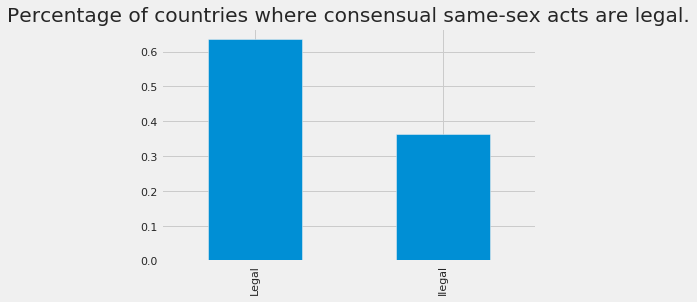

In [95]:
print('The percentage where SS acts are ilegal arround the globe is: \n', rdf['Legal (all genders)'].value_counts(normalize=True)*100)

legal = rdf['Legal (all genders)'].value_counts(normalize=True) 

legal.plot(kind='bar')
plt.title('Percentage of countries where consensual same-sex acts are legal.')

plt.show();


In [96]:
### Where SS acts are ilegal?

##There are 71 countries!


print('Countries where SS acts are ilegal.')
pd.DataFrame(rdf[rdf['Legal (all genders)'] == 'Ilegal'].index, index=range(1,72))

Countries where SS acts are ilegal.


,Country
1,Algeria
2,Angola
3,Botswana
4,Burundi
5,Cameroon
6,Comoros
7,Eritrea
8,Ethiopia
9,Gambia
10,Ghana


The percentage where SS acts are legal, but the age limit is not equal to heterosexual acts, arround the globe is: 
 Equal      87.096774
Unequal    12.903226
Name: Age Of consent, dtype: float64


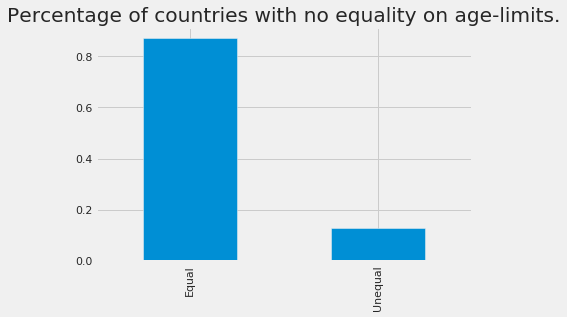

In [97]:
### In the countries where SS acts are legal, what proportion has the equality on age limit for consensual SS sex.

print('The percentage where SS acts are legal, but the age limit is not equal to heterosexual acts, arround the globe is: \n', (rdf[rdf['Legal (all genders)'] == 'Legal']['Age Of consent']).value_counts(normalize=True) * 100)

equalityonage = rdf[rdf['Legal (all genders)'] == 'Legal']['Age Of consent'].value_counts(normalize=True)

equalityonage.plot(kind='bar')
plt.title('Percentage of countries with no equality on age-limits.')

plt.show();

In [98]:
### What countries don't have equality on SS acts?

##There are 16 countries! Canada, Chile, Paraguay inclueded!

condition = (rdf[rdf['Legal (all genders)'] == 'Legal']['Age Of consent'] == 'Unequal')


print("Countries where SS acts are legal, but doesn't have equality on age limit.")
pd.DataFrame(condition[condition == True].index, index=range(1,17))

Countries where SS acts are legal, but doesn't have equality on age limit.


,Country
1,Benin
2,Chad
3,Congo
4,Cote d Ivoire
5,Gabon
6,Madagascar
7,Niger
8,Rwanda
9,Bahrain
10,Indonesia (most)


What's the proportion of countries with legal prohibition, towards Sexual Orientation discrimination: in employment and in regarding goods and/or services?


The propotion of countries with legal prohibition, towards Sexual Orientation discrimination:
  in employment is:
  No     0.625641
Yes    0.374359
Name: Employment Protection, dtype: float64 
 and in regarding goods and/or services is:
 No     0.671795
Yes    0.328205
Name: Other Protection, dtype: float64


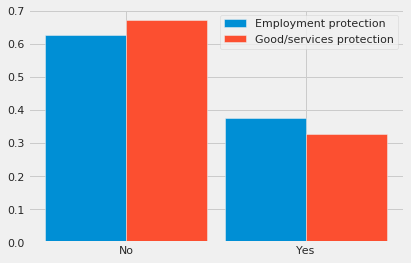

In [99]:
#set the width of the bars
barWidth = 0.45

#Set the height of the bars 
legalprotemploy = df['Employment Protection'].value_counts(normalize=True)
legalprotgoodser = df['Other Protection'].value_counts(normalize=True)

#Set the position of the bars on X axis.
r1 = np.arange(len(legalprotemploy))
r2 = [x + barWidth for x in r1]

#Make the plot.
plt.bar(r1, legalprotemploy, width=barWidth, label='Employment protection')
plt.bar(r2,legalprotgoodser, width=barWidth, label='Good/services protection')

plt.xticks([r + barWidth / 2 for r in range(len(legalprotemploy))], ['No','Yes'])


plt.legend()

print('The propotion of countries with legal prohibition, towards Sexual Orientation discrimination:\n  in employment is:\n ',legalprotemploy, '\n and in regarding goods and/or services is:\n', legalprotgoodser)
plt.show()


What's the proportion of countries with civil recognition on SS couples?

The propotion of countries with civil recognition of SS couples is:
  No     0.85641
Yes    0.14359
Name: Civil recognition, dtype: float64


Text(0.5, 1.0, 'Proportion of countries with civil recognotion of SS couples.')

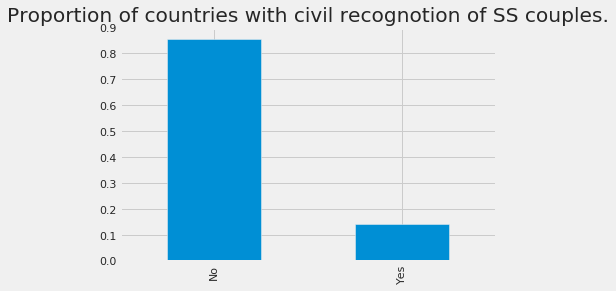

In [100]:
civilrecog = df['Civil recognition'].value_counts(normalize=True)

print('The propotion of countries with civil recognition of SS couples is:\n ',civilrecog)

civilrecog.plot(kind='bar')

plt.title('Proportion of countries with civil recognotion of SS couples.')

In [101]:
print('The countries whos have civil recognition on SS couples are:\n')
pd.DataFrame(df[df['Civil recognition']=='Yes'].index, index=range(1,29))

The countries whos have civil recognition on SS couples are:



,Country
1,South Africa
2,Israel
3,Taiwan
4,Andorra
5,Austria
6,Croatia
7,Cyprus
8,Czech Republic
9,Estonia
10,France


Where are SS couples able to afford joint adoption or is possible of second-parenting?

The propotion of countries with posibility on:
 Joint adoption is:
  No     0.866667
Yes    0.133333
Name: Joint adoption, dtype: float64 
 and on 2nd parent adoption is:
 No     0.866667
Yes    0.133333
Name: 2nd parent adoption, dtype: float64


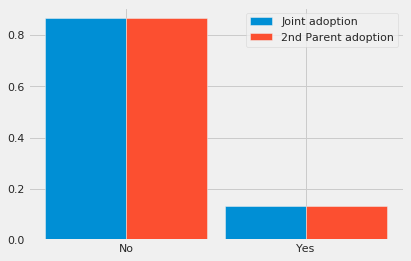

In [102]:
##first set the bars:

jointadop = df['Joint adoption'].value_counts(normalize=True)
secondparent = df['2nd parent adoption'].value_counts(normalize=True)

## set the bar width

barWidth = 0.45

r1 = np.arange(len(jointadop))
r2 = [x + barWidth for x in r1]

##make the plot

plt.bar(r1, jointadop, label='Joint adoption', width=barWidth)
plt.bar(r2,secondparent,width =barWidth, label='2nd Parent adoption')

plt.xticks([r + barWidth / 2 for r in range(len(jointadop))], ['No', 'Yes'])

plt.legend()

print('The propotion of countries with posibility on:\n Joint adoption is:\n ',jointadop, '\n and on 2nd parent adoption is:\n', secondparent)
plt.show()

It seems to be not distinction, but let's look closer:

In [103]:
print('These countries are whos have both rights:')
countrybothadop = pd.DataFrame(df[df['2nd parent adoption'] == 'Yes'].index).merge(pd.DataFrame(df[df['Joint adoption'] == 'Yes'].index), validate='one_to_one')

countrybothadop.index=range(1,23)

countrybothadop

These countries are whos have both rights:


,Country
1,South Africa
2,Andorra
3,Austria
4,Belgium
5,Denmark
6,Finland
7,France
8,Iceland
9,Ireland
10,Luxembourg


In [104]:
print("These are the countries whos has Joint Adoption but don't have the posibility of 2nd parent adoption")

pd.merge(pd.DataFrame(df[df['Joint adoption'] == 'Yes']['Joint adoption']),pd.DataFrame(df[df['2nd parent adoption'] == 'No']['2nd parent adoption']), how='inner', left_index=True, right_index=True)


# pd.DataFrame(df[df['Joint adoption'] == 'Yes']['Joint adoption'])

# pd.DataFrame(df[df['2nd parent adoption'] == 'Yes']['2nd parent adoption'])

These are the countries whos has Joint Adoption but don't have the posibility of 2nd parent adoption


,Joint adoption,2nd parent adoption
Country,,
Israel,Yes,No
Malta,Yes,No
Brazil,Yes,No
Mexico,Yes,No


In [105]:
print("These are the countries whos has 2nd parent adoption but don't have the posibility of Joint Adoption:")

pd.merge(pd.DataFrame(df[df['Joint adoption'] == 'No']['Joint adoption']),pd.DataFrame(df[df['2nd parent adoption'] == 'Yes']['2nd parent adoption']), how='inner', left_index=True, right_index=True)

These are the countries whos has 2nd parent adoption but don't have the posibility of Joint Adoption:


,Joint adoption,2nd parent adoption
Country,,
Estonia,No,Yes
Germany,No,Yes
Slovenia,No,Yes
Canada,No,Yes


We conclude that no all countries have the same rights into adoption.

What's the proportion of countries with legal option of SS marriage.

Only the  11.28 % of the countries arround the globe recognize same-sex marriage.


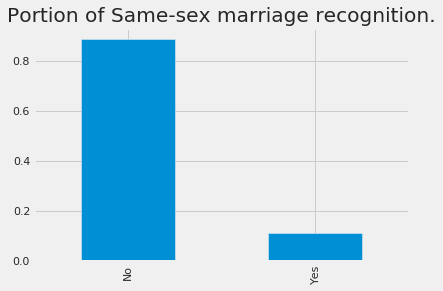

In [106]:
ssmarriage = df['Marriage Recognition'].value_counts(normalize=True)

ssmarriage.plot(kind='bar')

plt.title('Portion of Same-sex marriage recognition.')


print('Only the ', round(ssmarriage[1]*100,2),'% of the countries arround the globe recognize same-sex marriage.')

plt.show()

### In summary.

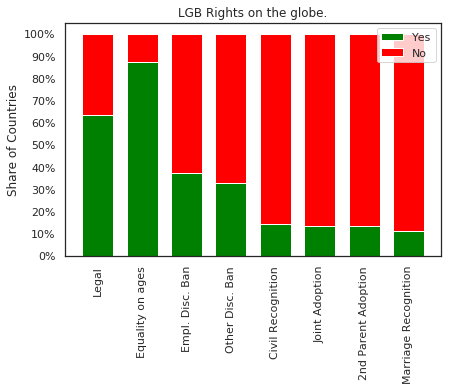

<Figure size 7200x7200 with 0 Axes>

In [107]:
# style.use('fivethirtyeight')
sns.set(style='white')
fig,ax = plt.subplots()
No = (legal['Ilegal']*100, equalityonage['Unequal']*100,legalprotemploy['No']*100,legalprotgoodser['No']*100,civilrecog['No']*100,jointadop['No']*100,secondparent['No']*100,ssmarriage['No']*100)
Yes = (legal['Legal']*100, equalityonage['Equal']*100, legalprotemploy['Yes']*100, legalprotgoodser['Yes']*100, civilrecog['Yes']*100,jointadop['Yes']*100,secondparent['Yes']*100,ssmarriage['Yes']*100)

ind = np.arange(8)    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Yes, width, color='green')
p2 = plt.bar(ind, No, width, bottom=Yes, color='red')

plt.ylabel('Share of Countries')
plt.title('LGB Rights on the globe.')
plt.xticks(ind, ('Legal', 'Equality on ages', 'Empl. Disc. Ban', 'Other Disc. Ban', 'Civil Recognition', 'Joint Adoption', '2nd Parent Adoption', 'Marriage Recognition'),rotation=90)
plt.yticks(np.arange(0, 105, 10),labels=['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.legend((p1[0], p2[0]), ('Yes', 'No'),loc=0)

plt.figure(figsize=(100,100))

plt.show()

Now, we are calculating our GILRHO-modified-index.

In [108]:
glrhoraw = df[['Country Code', 'Legal (all genders)', 'Age Of consent', 'Employment Protection', 'Other Protection', 'Civil recognition', 'Joint adoption', '2nd parent adoption', 'Marriage Recognition']]


print('This is the dataframe we will working with.')
glrhoraw.head()

This is the dataframe we will working with.


,Country Code,Legal (all genders),Age Of consent,Employment Protection,Other Protection,Civil recognition,Joint adoption,2nd parent adoption,Marriage Recognition
Country,,,,,,,,,
Algeria,DZA,Ilegal,Unknown,No,No,No,No,No,No
Angola,AGO,Ilegal,Unknown,No,No,No,No,No,No
Benin,BEN,Legal,Unequal,No,No,No,No,No,No
Botswana,BWA,Ilegal,Unknown,Yes,No,No,No,No,No
Burkina Faso,BFA,Legal,Equal,No,No,No,No,No,No


In order to make the Index, we need to modify the entries to numerical values. For the adoptions columns, I'll be considering half point in each rigt.

In [109]:
## 

glrhoraw[['Joint adoption', '2nd parent adoption']] = glrhoraw[['Joint adoption', '2nd parent adoption']].replace({'Yes':0.5,'No':0})


glrhoraw.head()


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Country Code,Legal (all genders),Age Of consent,Employment Protection,Other Protection,Civil recognition,Joint adoption,2nd parent adoption,Marriage Recognition
Country,,,,,,,,,
Algeria,DZA,Ilegal,Unknown,No,No,No,0.0,0.0,No
Angola,AGO,Ilegal,Unknown,No,No,No,0.0,0.0,No
Benin,BEN,Legal,Unequal,No,No,No,0.0,0.0,No
Botswana,BWA,Ilegal,Unknown,Yes,No,No,0.0,0.0,No
Burkina Faso,BFA,Legal,Equal,No,No,No,0.0,0.0,No


In [110]:
glrhoraw[['Employment Protection', 'Other Protection', 'Civil recognition', 'Marriage Recognition']] = glrhoraw[['Employment Protection', 'Other Protection', 'Civil recognition', 'Marriage Recognition']].replace({'Yes':1.0,'No':0})

glrhoraw.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Country Code,Legal (all genders),Age Of consent,Employment Protection,Other Protection,Civil recognition,Joint adoption,2nd parent adoption,Marriage Recognition
Country,,,,,,,,,
Algeria,DZA,Ilegal,Unknown,0.0,0.0,0.0,0.0,0.0,0.0
Angola,AGO,Ilegal,Unknown,0.0,0.0,0.0,0.0,0.0,0.0
Benin,BEN,Legal,Unequal,0.0,0.0,0.0,0.0,0.0,0.0
Botswana,BWA,Ilegal,Unknown,1.0,0.0,0.0,0.0,0.0,0.0
Burkina Faso,BFA,Legal,Equal,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
glrhoraw['Legal (all genders)'] = glrhoraw['Legal (all genders)'].replace({'Legal':1.0,'Ilegal':0})

glrhoraw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country Code,Legal (all genders),Age Of consent,Employment Protection,Other Protection,Civil recognition,Joint adoption,2nd parent adoption,Marriage Recognition
Country,,,,,,,,,
Algeria,DZA,0.0,Unknown,0.0,0.0,0.0,0.0,0.0,0.0
Angola,AGO,0.0,Unknown,0.0,0.0,0.0,0.0,0.0,0.0
Benin,BEN,1.0,Unequal,0.0,0.0,0.0,0.0,0.0,0.0
Botswana,BWA,0.0,Unknown,1.0,0.0,0.0,0.0,0.0,0.0
Burkina Faso,BFA,1.0,Equal,0.0,0.0,0.0,0.0,0.0,0.0


For the Age of consent, as we have countries where de SS acts are legal, but the age limit of consent is not equal, we are not giving any point to those.

In [112]:
glrhoraw['Age Of consent'] = glrhoraw['Age Of consent'].replace({'Equal':1.0,'Unequal':0,'Unknown':0})

glrhoraw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country Code,Legal (all genders),Age Of consent,Employment Protection,Other Protection,Civil recognition,Joint adoption,2nd parent adoption,Marriage Recognition
Country,,,,,,,,,
Algeria,DZA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Benin,BEN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Botswana,BWA,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Burkina Faso,BFA,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Finally the score of all countries.

In [113]:
glrhoraw['Score'] = glrhoraw.sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
glrhoraw

,Country Code,Legal (all genders),Age Of consent,Employment Protection,Other Protection,Civil recognition,Joint adoption,2nd parent adoption,Marriage Recognition,Score
Country,,,,,,,,,,
Algeria,DZA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Benin,BEN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Botswana,BWA,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Burkina Faso,BFA,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
Samoa,WSM,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Solomon Islands,SLB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tonga,TON,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [115]:
glrhoraw.describe()

,Legal (all genders),Age Of consent,Employment Protection,Other Protection,Civil recognition,Joint adoption,2nd parent adoption,Marriage Recognition,Score
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.635897,0.553846,0.374359,0.328205,0.143590,0.066667,0.066667,0.112821,2.282051
std,0.482416,0.498372,0.485203,0.470769,0.351576,0.170405,0.170405,0.317188,2.155653
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,7.000000


In [116]:
glrhoraw = glrhoraw.sort_index(axis=0, ascending=False, by='Score')

glrhoraw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,Country Code,Legal (all genders),Age Of consent,Employment Protection,Other Protection,Civil recognition,Joint adoption,2nd parent adoption,Marriage Recognition,Score
Country,,,,,,,,,,
Uruguay,URY,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0,7.0
Netherlands,NLD,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0,7.0
France,FRA,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0,7.0
United Kingdom (and associates),GBR,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0,7.0
Colombia,COL,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0,7.0


In [117]:
for i in [7,6.5,6,5.5,5,4.5,4,3.5,3,2.5,2,1.5,1,0.5,0]:
    score_df = pd.DataFrame(glrhoraw[glrhoraw['Score'] == i].index, index=range(1,len(glrhoraw[glrhoraw['Score'] ==i].index)+1))
    if score_df['Country'].empty:
      print('')
    else:
      print('There are',score_df.shape[0]  ,'countries with score', i,' and they are:')
      display(score_df)   

There are 6 countries with score 7  and they are:


,Country
1,Uruguay
2,Netherlands
3,France
4,United Kingdom (and associates)
5,Colombia
6,New Zealand


There are 2 countries with score 6.5  and they are:


,Country
1,Brazil
2,Mexico


There are 12 countries with score 6  and they are:


,Country
1,Norway
2,Ireland
3,South Africa
4,Finland
5,Denmark
6,Austria
7,Iceland
8,Sweden
9,Spain
10,Australia


There are 4 countries with score 5.5  and they are:


,Country
1,Germany
2,Slovenia
3,Malta
4,Estonia


There are 9 countries with score 5  and they are:


,Country
1,Argentina
2,Hungary
3,Andorra
4,Ecuador
5,Croatia
6,Czech Republic
7,United States
8,Cyprus
9,Portugal


There are 2 countries with score 4.5  and they are:


,Country
1,Canada
2,Israel


There are 24 countries with score 4  and they are:


,Country
1,Italy
2,Kosovo
3,Georgia
4,Lithuania
5,Romania
6,Bulgaria
7,Bosnia and Herzegovina
8,South Korea
9,Taiwan
10,Thailand



There are 20 countries with score 3  and they are:


,Country
1,Philippines
2,Suriname
3,Panama
4,Cape Verde
5,Mongolia
6,Honduras
7,Guatemala
8,Dominican Republic
9,Cuba
10,San Marino



There are 35 countries with score 2  and they are:


,Country
1,Haiti
2,Turkey
3,Vietnam
4,Monaco
5,Bahamas
6,Belize
7,Belarus
8,Marshall Islands
9,Azerbaijan
10,Micronesia



There are 16 countries with score 1  and they are:


,Country
1,Kiribati
2,Benin
3,Madagascar
4,Tonga
5,Rwanda
6,Gabon
7,Chad
8,Paraguay
9,Bahrain
10,St Lucia



There are 65 countries with score 0  and they are:


,Country
1,Guinea
2,Comoros
3,Libya
4,Tuvalu
5,Liberia
6,Dominica
7,Kenya
8,Solomon Islands
9,Cameroon
10,Burundi


#What about GDP?

For this instance, I'm consider just the GPD per capita.

In [118]:
gdppc = df[['Country Code',
            'GDP per capita (current US$) - 2007',
            'GDP per capita (current US$) - 2008',
            'GDP per capita (current US$) - 2009',
            'GDP per capita (current US$) - 2010',
            'GDP per capita (current US$) - 2011',
            'GDP per capita (current US$) - 2012',
            'GDP per capita (current US$) - 2013',
            'GDP per capita (current US$) - 2014',
            'GDP per capita (current US$) - 2015',
            'GDP per capita (current US$) - 2016',
            'GDP per capita (current US$) - 2017']]

gdppc.head()

,Country Code,GDP per capita (current US$) - 2007,GDP per capita (current US$) - 2008,GDP per capita (current US$) - 2009,GDP per capita (current US$) - 2010,GDP per capita (current US$) - 2011,GDP per capita (current US$) - 2012,GDP per capita (current US$) - 2013,GDP per capita (current US$) - 2014,GDP per capita (current US$) - 2015,GDP per capita (current US$) - 2016,GDP per capita (current US$) - 2017
Country,,,,,,,,,,,,
Algeria,DZA,3950.561607,4923.540099,3883.378143,4480.724539,5455.741338,5592.326098,5499.581487,5493.025590,4177.867517,3946.421445,4044.298372
Angola,AGO,3121.995637,4080.941410,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942
Benin,BEN,706.053375,820.150878,793.452253,758.435083,827.022611,837.894997,915.575816,944.931653,784.278407,789.084915,829.478803
Botswana,BWA,5832.733942,5713.534983,5255.768461,6434.815657,7617.325094,7877.790350,7224.965172,7780.638385,6799.875234,7243.852997,7893.210108
Burkina Faso,BFA,475.110012,569.761317,552.745589,575.446453,666.840120,673.821598,699.779406,703.820056,575.314454,582.795444,642.429839


In [119]:
gdppc[[     'GDP per capita (current US$) - 2007',
            'GDP per capita (current US$) - 2008',
            'GDP per capita (current US$) - 2009',
            'GDP per capita (current US$) - 2010',
            'GDP per capita (current US$) - 2011',
            'GDP per capita (current US$) - 2012',
            'GDP per capita (current US$) - 2013',
            'GDP per capita (current US$) - 2014',
            'GDP per capita (current US$) - 2015',
            'GDP per capita (current US$) - 2016',
            'GDP per capita (current US$) - 2017']].isnull().sum() / len(gdppc) * 100

GDP per capita (current US$) - 2007    2.564103
GDP per capita (current US$) - 2008    2.564103
GDP per capita (current US$) - 2009    2.564103
GDP per capita (current US$) - 2010    2.564103
GDP per capita (current US$) - 2011    2.564103
GDP per capita (current US$) - 2012    3.076923
GDP per capita (current US$) - 2013    2.051282
GDP per capita (current US$) - 2014    2.051282
GDP per capita (current US$) - 2015    2.564103
GDP per capita (current US$) - 2016    3.076923
GDP per capita (current US$) - 2017    3.589744
dtype: float64

##Because in 2017 the GDP could be affected by another issues, we are going to take the average of the last 11 years, in order to compare wealthiness of countries.

In [120]:
gdppc['Average'] = gdppc.mean(axis=1, skipna=True)

gdppc.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country Code,GDP per capita (current US$) - 2007,GDP per capita (current US$) - 2008,GDP per capita (current US$) - 2009,GDP per capita (current US$) - 2010,GDP per capita (current US$) - 2011,GDP per capita (current US$) - 2012,GDP per capita (current US$) - 2013,GDP per capita (current US$) - 2014,GDP per capita (current US$) - 2015,GDP per capita (current US$) - 2016,GDP per capita (current US$) - 2017,Average
Country,,,,,,,,,,,,,
Algeria,DZA,3950.561607,4923.540099,3883.378143,4480.724539,5455.741338,5592.326098,5499.581487,5493.025590,4177.867517,3946.421445,4044.298372,4677.042385
Angola,AGO,3121.995637,4080.941410,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,4187.393072
Benin,BEN,706.053375,820.150878,793.452253,758.435083,827.022611,837.894997,915.575816,944.931653,784.278407,789.084915,829.478803,818.759890
Botswana,BWA,5832.733942,5713.534983,5255.768461,6434.815657,7617.325094,7877.790350,7224.965172,7780.638385,6799.875234,7243.852997,7893.210108,6879.500944
Burkina Faso,BFA,475.110012,569.761317,552.745589,575.446453,666.840120,673.821598,699.779406,703.820056,575.314454,582.795444,642.429839,610.714935


In [121]:
### Checking for null values we got this.

print(gdppc.shape)

gdppc[gdppc['Average'].isnull() == True]


(195, 13)


,Country Code,GDP per capita (current US$) - 2007,GDP per capita (current US$) - 2008,GDP per capita (current US$) - 2009,GDP per capita (current US$) - 2010,GDP per capita (current US$) - 2011,GDP per capita (current US$) - 2012,GDP per capita (current US$) - 2013,GDP per capita (current US$) - 2014,GDP per capita (current US$) - 2015,GDP per capita (current US$) - 2016,GDP per capita (current US$) - 2017,Average
Country,,,,,,,,,,,,,
North Korea,PRK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taiwan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
## we are dropping them out.

gdppc = gdppc.drop(labels=['North Korea', 'Taiwan'], axis=0)

gdppc.shape

(193, 13)

Now we are merging the Score of the countries and the GDP per capita in the last 11 years.

In [123]:
corrtable = pd.DataFrame(glrhoraw[['Country Code','Score']]).merge(pd.DataFrame(gdppc['Average']), left_index=True, right_index=True)

corrtable

,Country Code,Score,Average
Country,,,
Uruguay,URY,7.0,13473.964162
Netherlands,NLD,7.0,51075.149909
France,FRA,7.0,41052.549352
United Kingdom (and associates),GBR,7.0,43433.445845
Colombia,COL,7.0,6527.603045
...,...,...,...
Tunisia,TUN,0.0,4030.982703
Uganda,UGA,0.0,612.274222
Zambia,ZMB,0.0,1490.809264


##Now we are going to identify outliers in order to divide by groups the Average values and then plot them in a scatter graph.

In [124]:
corrtable.describe()

,Score,Average
count,193.000000,193.000000
mean,2.274611,14635.259096
std,2.163193,23859.914732
min,0.000000,248.339339
25%,0.000000,1661.591034
50%,2.000000,5279.952749
75%,4.000000,14368.416818
max,7.000000,168822.940309


In [125]:
Q1 = corrtable['Average'].quantile(0.25)
Q3 = corrtable['Average'].quantile(0.75)
IQR = Q3 - Q1
print(IQR) 

corrtable_out = corrtable[~((corrtable['Average']<Q1-1.5*IQR)| ((corrtable['Average']>Q3+1.5*IQR)))]

print(corrtable_out.shape)

display(corrtable_out)
print('')
corrtable_out.describe()

12706.825783999999
(164, 3)


,Country Code,Score,Average
Country,,,
Uruguay,URY,7.0,13473.964162
Colombia,COL,7.0,6527.603045
Brazil,BRA,6.5,10318.145131
Mexico,MEX,6.5,9695.496086
South Africa,ZAF,6.0,6451.127235
...,...,...,...
Tunisia,TUN,0.0,4030.982703
Uganda,UGA,0.0,612.274222
Zambia,ZMB,0.0,1490.809264


,Score,Average
count,164.000000,164.000000
mean,1.902439,6511.490295
std,1.892736,7024.479191
min,0.000000,248.339339
25%,0.000000,1380.904934
50%,2.000000,3812.519743
75%,3.000000,8870.839210
max,7.000000,33337.317176


#Normalization

In [126]:
corrtable['Score_norm'] = (corrtable['Score'] - corrtable['Score'].mean() ) / corrtable['Score'].std()

corrtable['Average_norm'] = (corrtable['Average'] - corrtable['Average'].mean() ) / corrtable['Average'].std()

corrtable.describe()

,Score,Average,Score_norm,Average_norm
count,193.000000,193.000000,1.930000e+02,1.930000e+02
mean,2.274611,14635.259096,-1.380588e-16,9.002586e-17
std,2.163193,23859.914732,1.000000e+00,1.000000e+00
min,0.000000,248.339339,-1.051506e+00,-6.029745e-01
25%,0.000000,1661.591034,-1.051506e+00,-5.437433e-01
50%,2.000000,5279.952749,-1.269472e-01,-3.920930e-01
75%,4.000000,14368.416818,7.976119e-01,-1.118371e-02
max,7.000000,168822.940309,2.184451e+00,6.462206e+00


In [0]:
corrtable['Cat-Score'] = pd.cut(corrtable['Score_norm'], bins=15, right=False, include_lowest=True, labels=range(1,16))
corrtable['Cat-Average'] = pd.cut(corrtable['Average_norm'], bins=15, right=False, include_lowest=True, labels=range(1,16))

In [128]:
display(corrtable.head())

,Country Code,Score,Average,Score_norm,Average_norm,Cat-Score,Cat-Average
Country,,,,,,,
Uruguay,URY,7.0,13473.964162,2.184451,-0.048671,15,2
Netherlands,NLD,7.0,51075.149909,2.184451,1.527243,15,5
France,FRA,7.0,41052.549352,2.184451,1.107183,15,4
United Kingdom (and associates),GBR,7.0,43433.445845,2.184451,1.206969,15,4
Colombia,COL,7.0,6527.603045,2.184451,-0.339802,15,1


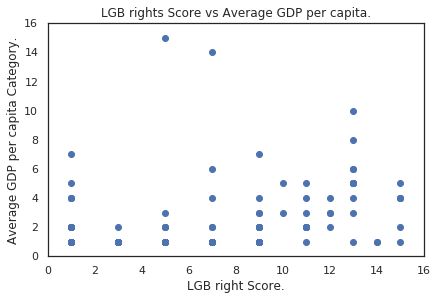

In [129]:
x = corrtable['Cat-Score']
y = corrtable['Cat-Average']

plt.scatter(x,y)

plt.ylim([0,16])
plt.xlim([0,16])
plt.title('LGB rights Score vs Average GDP per capita.')
plt.xlabel('LGB right Score.')
plt.ylabel('Average GDP per capita Category.')


plt.show()

In [130]:
contingency_table = pd.crosstab(corrtable['Cat-Score'],corrtable['Cat-Average'])

contingency_table

Cat-Average,1,2,3,4,5,6,7,8,10,14,15
Cat-Score,,,,,,,,,,,
1,54,6,0,3,1,0,1,0,0,0,0
3,15,1,0,0,0,0,0,0,0,0,0
5,29,3,1,0,0,0,0,0,0,0,1
7,15,2,0,1,0,1,0,0,0,1,0
9,14,5,2,1,0,0,1,0,0,0,0
10,0,0,1,0,1,0,0,0,0,0,0
11,1,5,1,1,1,0,0,0,0,0,0
12,0,1,2,1,0,0,0,0,0,0,0
13,1,0,1,1,5,2,0,1,1,0,0


In [131]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 228.292756907957
P-value: 4.979967703399853e-12
Degrees of Freedom: 100
Expected: 
 [[4.44559585e+01 8.08290155e+00 2.69430052e+00 3.70466321e+00
  3.03108808e+00 1.01036269e+00 6.73575130e-01 3.36787565e-01
  3.36787565e-01 3.36787565e-01 3.36787565e-01]
 [1.09430052e+01 1.98963731e+00 6.63212435e-01 9.11917098e-01
  7.46113990e-01 2.48704663e-01 1.65803109e-01 8.29015544e-02
  8.29015544e-02 8.29015544e-02 8.29015544e-02]
 [2.32538860e+01 4.22797927e+00 1.40932642e+00 1.93782383e+00
  1.58549223e+00 5.28497409e-01 3.52331606e-01 1.76165803e-01
  1.76165803e-01 1.76165803e-01 1.76165803e-01]
 [1.36787565e+01 2.48704663e+00 8.29015544e-01 1.13989637e+00
  9.32642487e-01 3.10880829e-01 2.07253886e-01 1.03626943e-01
  1.03626943e-01 1.03626943e-01 1.03626943e-01]
 [1.57305699e+01 2.86010363e+00 9.53367876e-01 1.31088083e+00
  1.07253886e+00 3.57512953e-01 2.38341969e-01 1.19170984e-01
  1.19170984e-01 1.19170984e-01 1.19170984e-01]
 [1.36787565e+00 2.48704663e-01 8.29015544e

With a p-value the zero and an Statistic of 355.46 we reject the (null) hypothesis that the Score value and the average of the GDP per capita of the last 11 years are independent. They must be associated.

#Plotting maps.

In [132]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

print(world.shape)

world.head()

(177, 6)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [133]:
world['iso_a3'].describe()

##Allshould be unique, except for Greenland, which is a territory of The Kingdom of Denmark.

count     177
unique    173
top       -99
freq        5
Name: iso_a3, dtype: object

In [134]:
world[world['iso_a3']== '-99']

##These countries have wrong Country code. So let's repair this.

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
21,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
160,265100,Asia,N. Cyprus,-99,3600.0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550..."
167,3500000,Africa,Somaliland,-99,12250.0,"POLYGON ((48.94820 11.41062, 48.94820 11.41062..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


In [0]:
### As Northern Cyprus is a de 'de facto' state and Somaliland an autonomous region of Somalia, we will not considerete them. 

### Also we are dropping Antarctica.

In [136]:
world[world['continent']== 'Antarctica']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
159,4050,Antarctica,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."


In [137]:
world[world['name']== 'Greenland']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
22,57713,North America,Greenland,GRL,2173.0,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."


In [138]:
world.loc[21,'iso_a3'] = 'NOR'
world.loc[22,'iso_a3'] = 'DNK'
world.loc[43,'iso_a3'] = 'FRA'
world.loc[174,'iso_a3'] = 'XKX'


world = world.drop(labels=[159,160,167], axis=0)


print(world.shape)

world.head()

(174, 6)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [139]:
world['iso_a3'].describe()

count     174
unique    173
top       DNK
freq        2
Name: iso_a3, dtype: object

In [140]:
world_index = world.set_index('iso_a3').join(corrtable.set_index('Country Code'))

world_index.head(25)

,pop_est,continent,name,gdp_md_est,geometry,Score,Average,Score_norm,Average_norm,Cat-Score,Cat-Average
AFG,34124811,Asia,Afghanistan,64080.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",0.0,533.798671,-1.051506,-0.591011,1,1
AGO,29310273,Africa,Angola,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",0.0,4187.393072,-1.051506,-0.437884,1,1
ALB,3047987,Europe,Albania,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",4.0,4223.677169,0.797612,-0.436363,9,1
ARE,6072475,Asia,United Arab Emirates,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",0.0,39561.676954,-1.051506,1.044699,1,4
ARG,44293293,South America,Argentina,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",5.0,11581.379164,1.259892,-0.127992,11,2
ARM,3045191,Asia,Armenia,26300.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...",2.0,3591.686987,-0.126947,-0.462850,5,1
ATF,140,Seven seas (open ocean),Fr. S. Antarctic Lands,16.0,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",NaN,NaN,NaN,NaN,NaN,NaN
AUS,23232413,Oceania,Australia,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",6.0,55212.763661,1.722171,1.700656,13,5
AUT,8754413,Europe,Austria,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",6.0,48419.100145,1.722171,1.415925,13,5
AZE,9961396,Asia,Azerbaijan,167900.0,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41...",2.0,5836.395197,-0.126947,-0.368772,5,1


In [141]:
# We got some missing values:

print(world_index.shape)
world_index[world_index['Score'].isnull()]

(174, 11)


,pop_est,continent,name,gdp_md_est,geometry,Score,Average,Score_norm,Average_norm,Cat-Score,Cat-Average
ATF,140,Seven seas (open ocean),Fr. S. Antarctic Lands,16.00,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",NaN,NaN,NaN,NaN,NaN,NaN
ESH,603253,Africa,W. Sahara,906.50,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN
FLK,2931,South America,Falkland Is.,281.80,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",NaN,NaN,NaN,NaN,NaN,NaN
NCL,279070,Oceania,New Caledonia,10770.00,"POLYGON ((165.77999 -21.08000, 166.59999 -21.7...",NaN,NaN,NaN,NaN,NaN,NaN
PRI,3351827,North America,Puerto Rico,131000.00,"POLYGON ((-66.28243 18.51476, -65.77130 18.426...",NaN,NaN,NaN,NaN,NaN,NaN
PRK,25248140,Asia,North Korea,40000.00,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",NaN,NaN,NaN,NaN,NaN,NaN
PSE,4543126,Asia,Palestine,21220.77,"POLYGON ((35.39756 31.48909, 34.92741 31.35344...",NaN,NaN,NaN,NaN,NaN,NaN
TWN,23508428,Asia,Taiwan,1127000.00,"POLYGON ((121.77782 24.39427, 121.17563 22.790...",NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
world_index['Score'].fillna(-2,inplace=True)

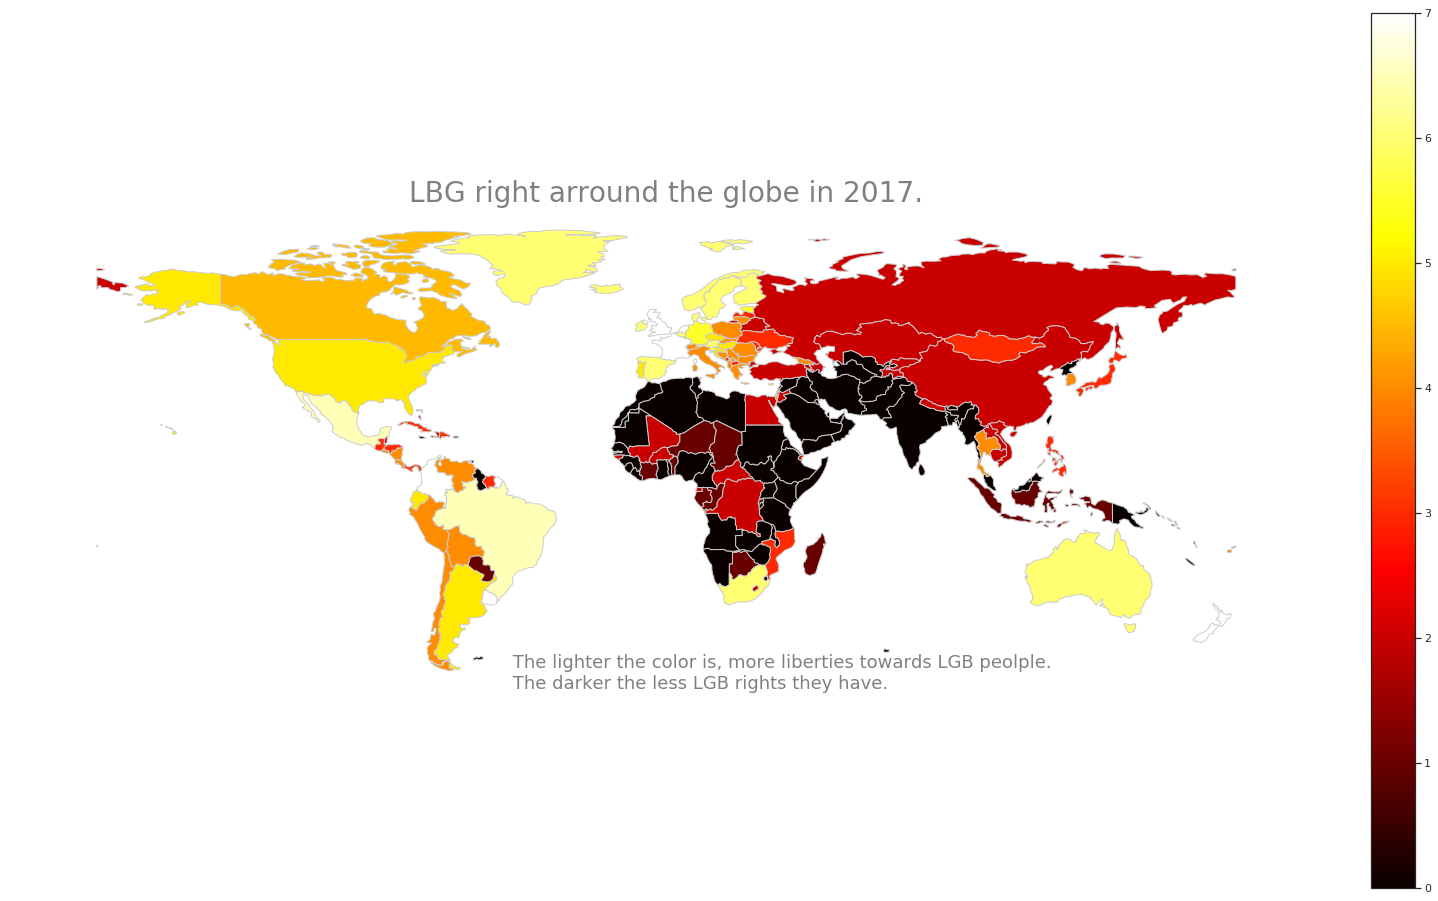

In [143]:
###

#Set the variable we will call from the dataframe

variable = 'Score'

vmin,vmax = 0,7.0

fig,ax = plt.subplots(1, figsize=(25,15))

#Draw map 
world_index[~(world_index['Score']==-2)].plot(cmap= 'hot', column=variable, edgecolor='0.8',figsize=(20,20), ax=ax,legend=True)
world_index[(world_index['Score']==-2)].plot(cmap= 'gray', column=variable, edgecolor='0.8',figsize=(20,20), ax=ax)
ax.axis('off')

ax.set_title('')

ax.annotate(' The lighter the color is, more liberties towards LGB peolple.\n The darker the less LGB rights they have.', 
            xy=(-50.3,-62.5), horizontalalignment='left', verticalalignment='bottom', fontsize=18, color='Gray')

ax.set_title('LBG right arround the globe in 2017.', fontsize=28, color='gray')

plt.show()

In [0]:
fig.savefig('map_score_export.png', dpi=300)

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:510: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


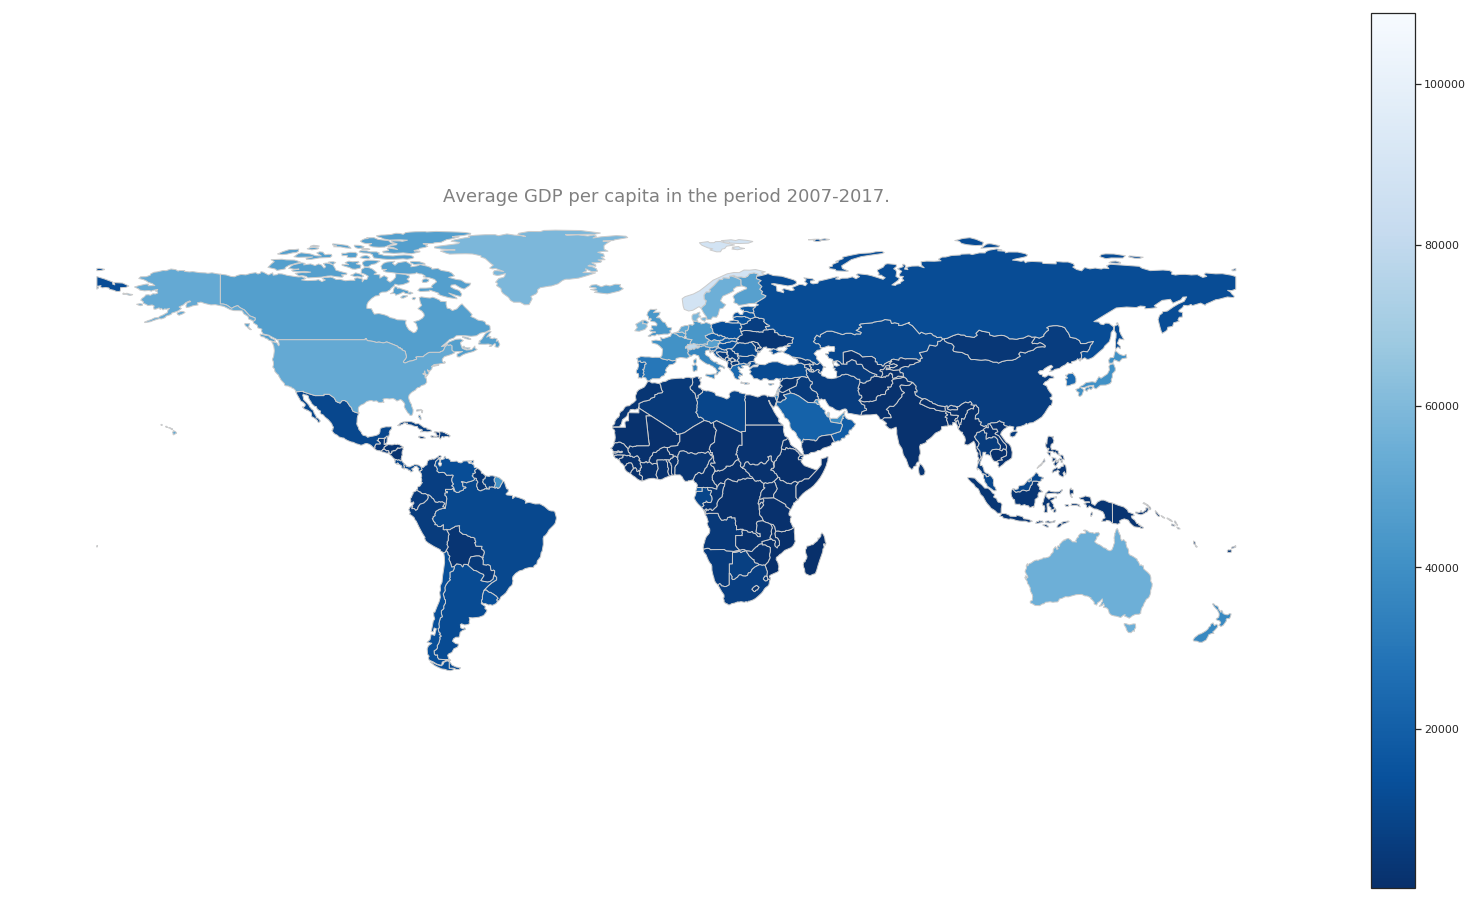

In [145]:
#Set the variable we will call from the dataframe

variable = 'Average'

vmin,vmax = 0,7.0

fig2,ax = plt.subplots(1, figsize=(25,15))

#Draw map 
world_index[~(world_index['Average'].isnull())].plot(cmap= 'Blues_r', column=variable, edgecolor='0.8',figsize=(20,20), ax=ax,legend=True)
world_index[(world_index['Score'].isnull())].plot(cmap= 'gray', column=variable, edgecolor='0.8',figsize=(20,20), ax=ax)

ax.axis('off')

ax.set_title('')

# ax.annotate('The lighter the color is, more liberties towards LGB peolple in that country.\n The darker the less LGB rights they have.\n No information provided for the gray countries.', 
#            xy=(-10.3,-60.1), horizontalalignment='left', verticalalignment='bottom', fontsize=12, color='white')

ax.set_title('Average GDP per capita in the period 2007-2017.', fontsize=18, color='Gray')

plt.show()

In [0]:
fig2.savefig('map_gdppc_export.png', dpi=300)

# Draft